<a href="https://colab.research.google.com/github/ashwinn-v/ConceteCrackClassifier/blob/main/ConcreteCrackXception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concrete Crack Xception

In [ ]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format



In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
#from tensorflow.keras.applications.xception import
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip
!unzip 5y9wdsg2zt-2.zip
!unrar x 'Concrete Crack Images for Classification.rar'

Streaming output truncated to the last 5000 lines.
Extracting  Negative/15002.jpg                                            88%  OK 
Extracting  Negative/15003.jpg                                            88%  OK 
Extracting  Negative/15004.jpg                                            88%  OK 
Extracting  Negative/15005.jpg                                            88%  OK 
Extracting  Negative/15006.jpg                                            88%  OK 
Extracting  Negative/15007.jpg                                            88%  OK 
Extracting  Negative/15008.jpg                                            88%  OK 
Extracting  Negative/15009.jpg                                            88%  OK 
Extracting  Negative/15010.jpg                                            88%  OK 
Extracting  Negative/15011.jpg                                            88%  OK 
Extracting  Negative/15012.jp

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import shutil
os.mkdir("/content/Images")

original = r'/content/Positive'
target = r'/content/Images/Positive'

shutil.move(original,target)

original = r'/content/Negative'
target = r'/content/Images/Negative'

shutil.move(original,target)


'/content/Images/Negative'

In [ ]:
pip install split-folders

In [ ]:
import splitfolders  

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("Images", output="Data1", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

base_dir = '/content/Data1'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_pos_dir = os.path.join(train_dir, 'Positive')
train_neg_dir = os.path.join(train_dir, 'Negative')
val_pos_dir = os.path.join(validation_dir, 'Positive')
val_neg_dir = os.path.join(validation_dir, 'Negative')

Copying files: 40000 files [00:05, 7968.37 files/s]


In [ ]:
from tensorflow import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


In [ ]:
base_model=tf.keras.applications.xception.Xception(include_top=False, weights="imagenet", input_shape=(150,150,3))
base_model.trainable=False

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 51200)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 512)               26214912  
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 1)                 513       
Total params: 47,076,905
Trainable params: 26,215,425
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
 classifier.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = classifier.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=3,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Found 32000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/3
100/100 [==============================] - 38s 67ms/step - loss: 0.1337 - tp: 985.0000 - fp: 27.0000 - tn: 974.0000 - fn: 14.0000 - accuracy: 0.9795 - precision: 0.9733 - recall: 0.9860 - auc: 0.9935 - val_loss: 0.0555 - val_tp: 494.0000 - val_fp: 3.0000 - val_tn: 501.0000 - val_fn: 2.0000 - val_accuracy: 0.9950 - val_precision: 0.9940 - val_recall: 0.9960 - val_auc: 0.9964
Epoch 2/3
100/100 [==============================] - 5s 54ms/step - loss: 0.0451 - tp: 986.0000 - fp: 5.0000 - tn: 1002.0000 - fn: 7.0000 - accuracy: 0.9940 - precision: 0.9950 - recall: 0.9930 - auc: 0.9975 - val_loss: 0.0325 - val_tp: 514.0000 - val_fp: 1.0000 - val_tn: 480.0000 - val_fn: 5.0000 - val_accuracy: 0.9940 - val_precision: 0.9981 - val_recall: 0.9904 - val_auc: 0.9980
Epoch 3/3
100/100 [==============================] - 5s 54ms/step - loss: 0.0641 - tp: 1033.0000 - fp: 3.0000 - tn: 959.0000 - fn: 5.0000 - acc

In [ ]:
history.model.save("mymodel")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: mymodel/assets


INFO:tensorflow:Assets written to: mymodel/assets


In [ ]:
history.model.save_weights("weights.h5")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


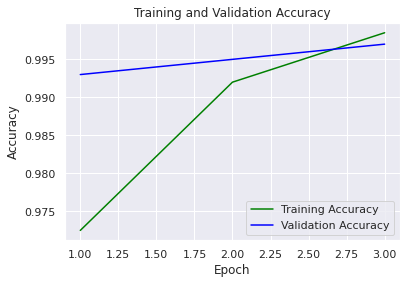

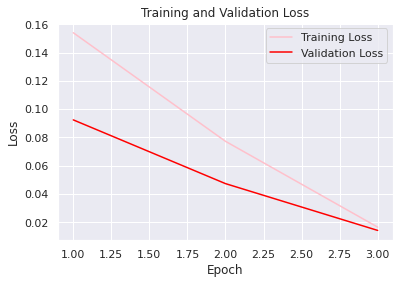

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()